In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# heart = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
# satura = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv")
heart = pd.read_csv("./input/heart.csv")
satura = pd.read_csv("./input/o2Saturation.csv")

In [3]:
heart.shape, satura.shape

((303, 14), (3585, 1))

In [4]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
category_features=['sex', 'cp', 'fbs', 'restecg', 'slp', 'caa', 'thall', 'exng']
numeric_features=['age','trtbps','chol','thalachh','oldpeak']

c_feature =[]
n_feature = []
for feature in category_features:
    # print(feature,':',heart[feature].unique())
    if feature in heart.columns:
        c_feature.append(feature)

for feature in numeric_features:
    # print(feature,':',heart[feature].unique())
    if feature in heart.columns:
        n_feature.append(feature)

numeric_data = heart[n_feature]
category_data = heart[c_feature]

In [9]:
satura.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


# 1. Exploratory Data Analysis

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

1    165
0    138
Name: output, dtype: int64


Text(0.5, 1.0, 'Distribution of target values')

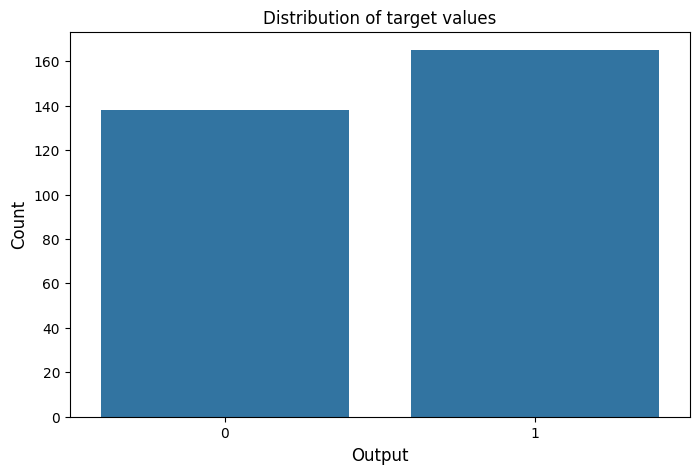

In [11]:
print(heart['output'].value_counts())
plt.figure(figsize = (8, 5))
sns.countplot(x = heart['output'])
plt.xlabel("Output", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution of target values", size = 12)

In [12]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

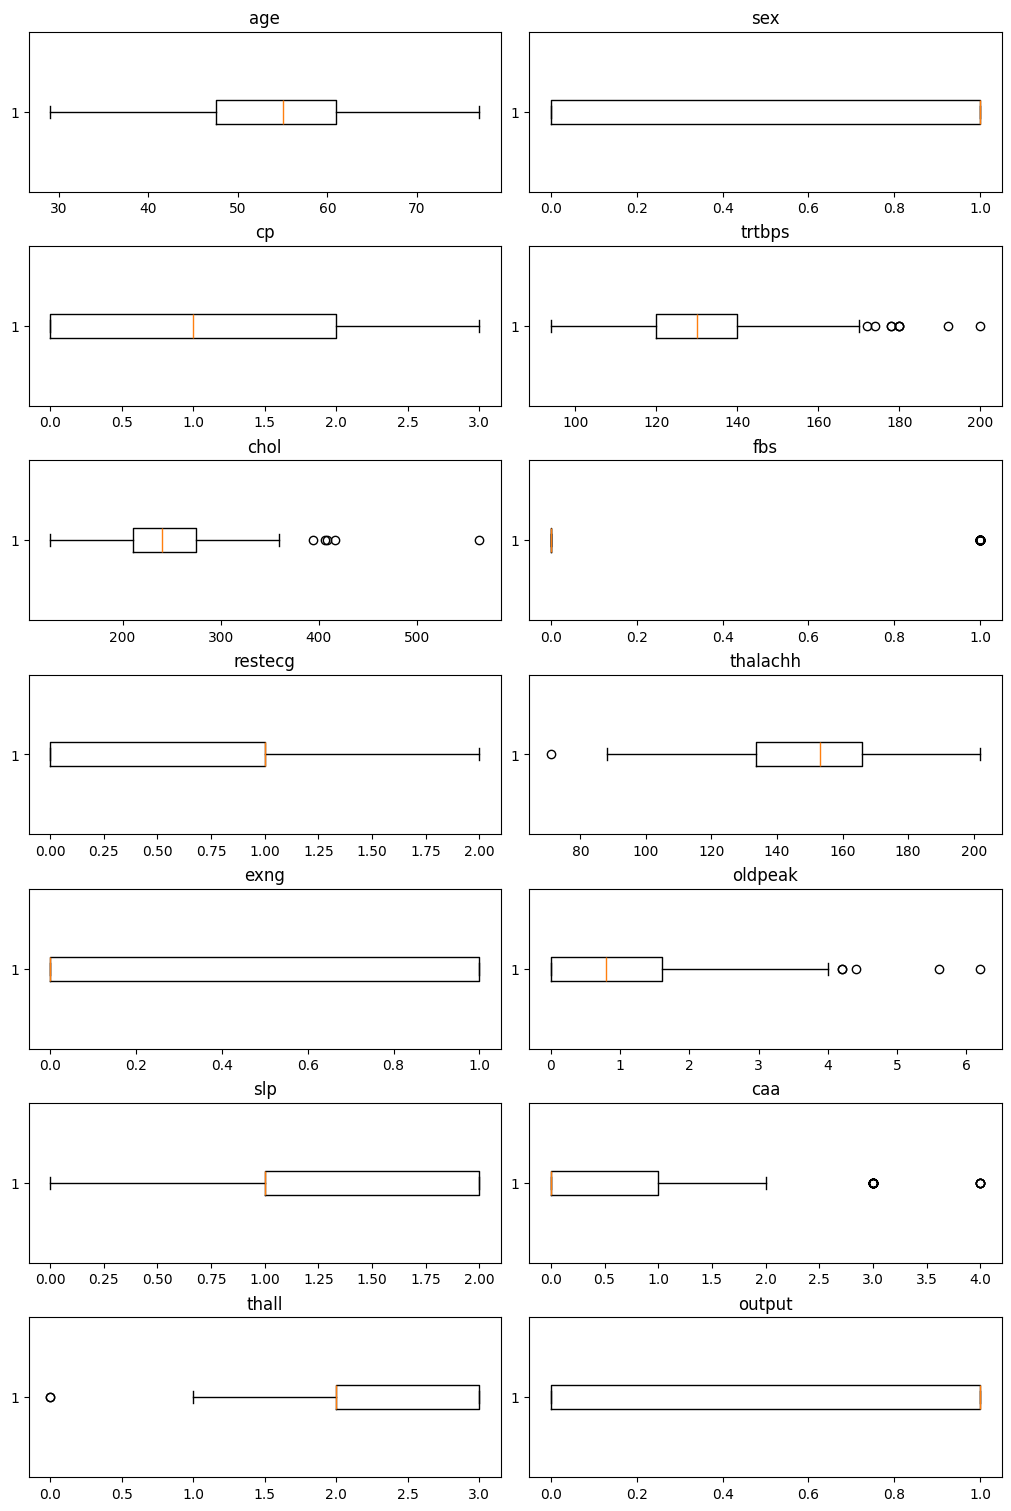

In [13]:
col = heart.columns
fgi, ax = plt.subplots(7,2 , figsize = (10,15), constrained_layout=True)
ax = ax.flatten()
for ind, axi in enumerate(ax.flat):
    axi.boxplot(heart[col[ind]], vert = False)
    axi.set_title(col[ind], size = 12)

<Axes: >

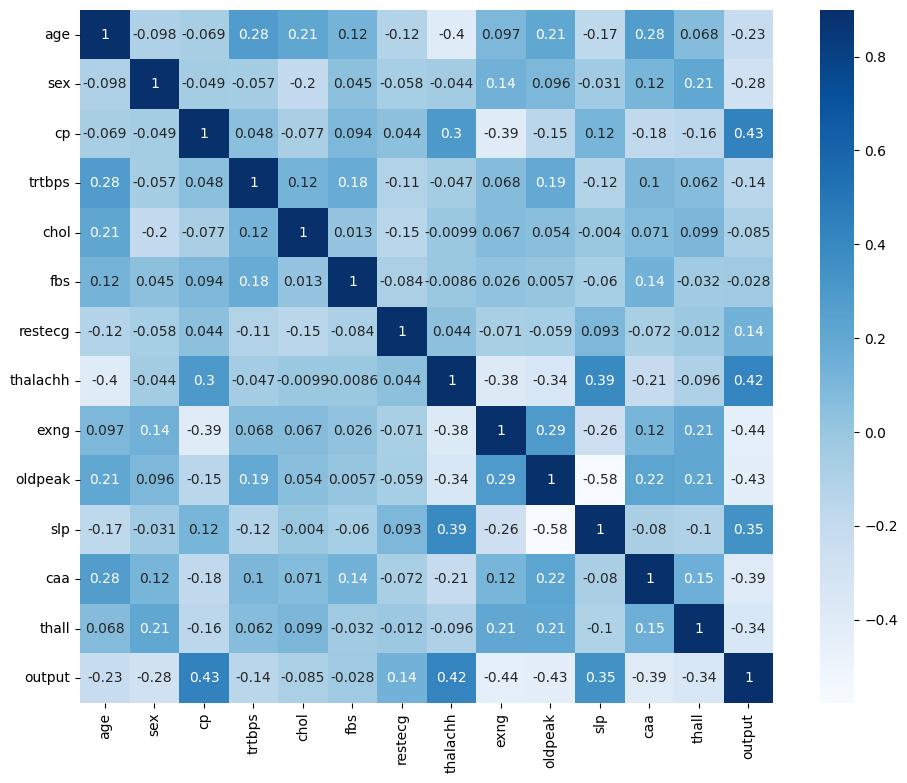

In [14]:
corr = heart.corr()
plt.figure(figsize =  (12,9))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True, annot = True)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

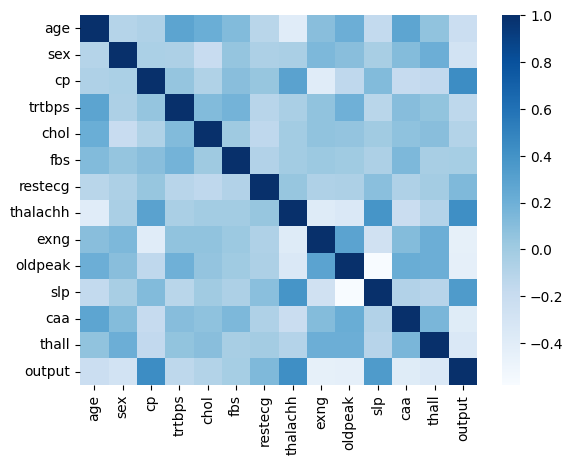

In [15]:
display(heart.corr())
sns.heatmap(heart.corr(), cmap="Blues")

In [16]:
rel = corr['output'].sort_values(ascending = False)
rel

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

In [17]:
# higher correlation between output and features(cp, thalachh, clp, restecg)
positive_list = []
for i in range (len(rel)):
    if rel.iloc[i] > 0:
        positive_list.append(rel.index[i])
positive_list

['output', 'cp', 'thalachh', 'slp', 'restecg']

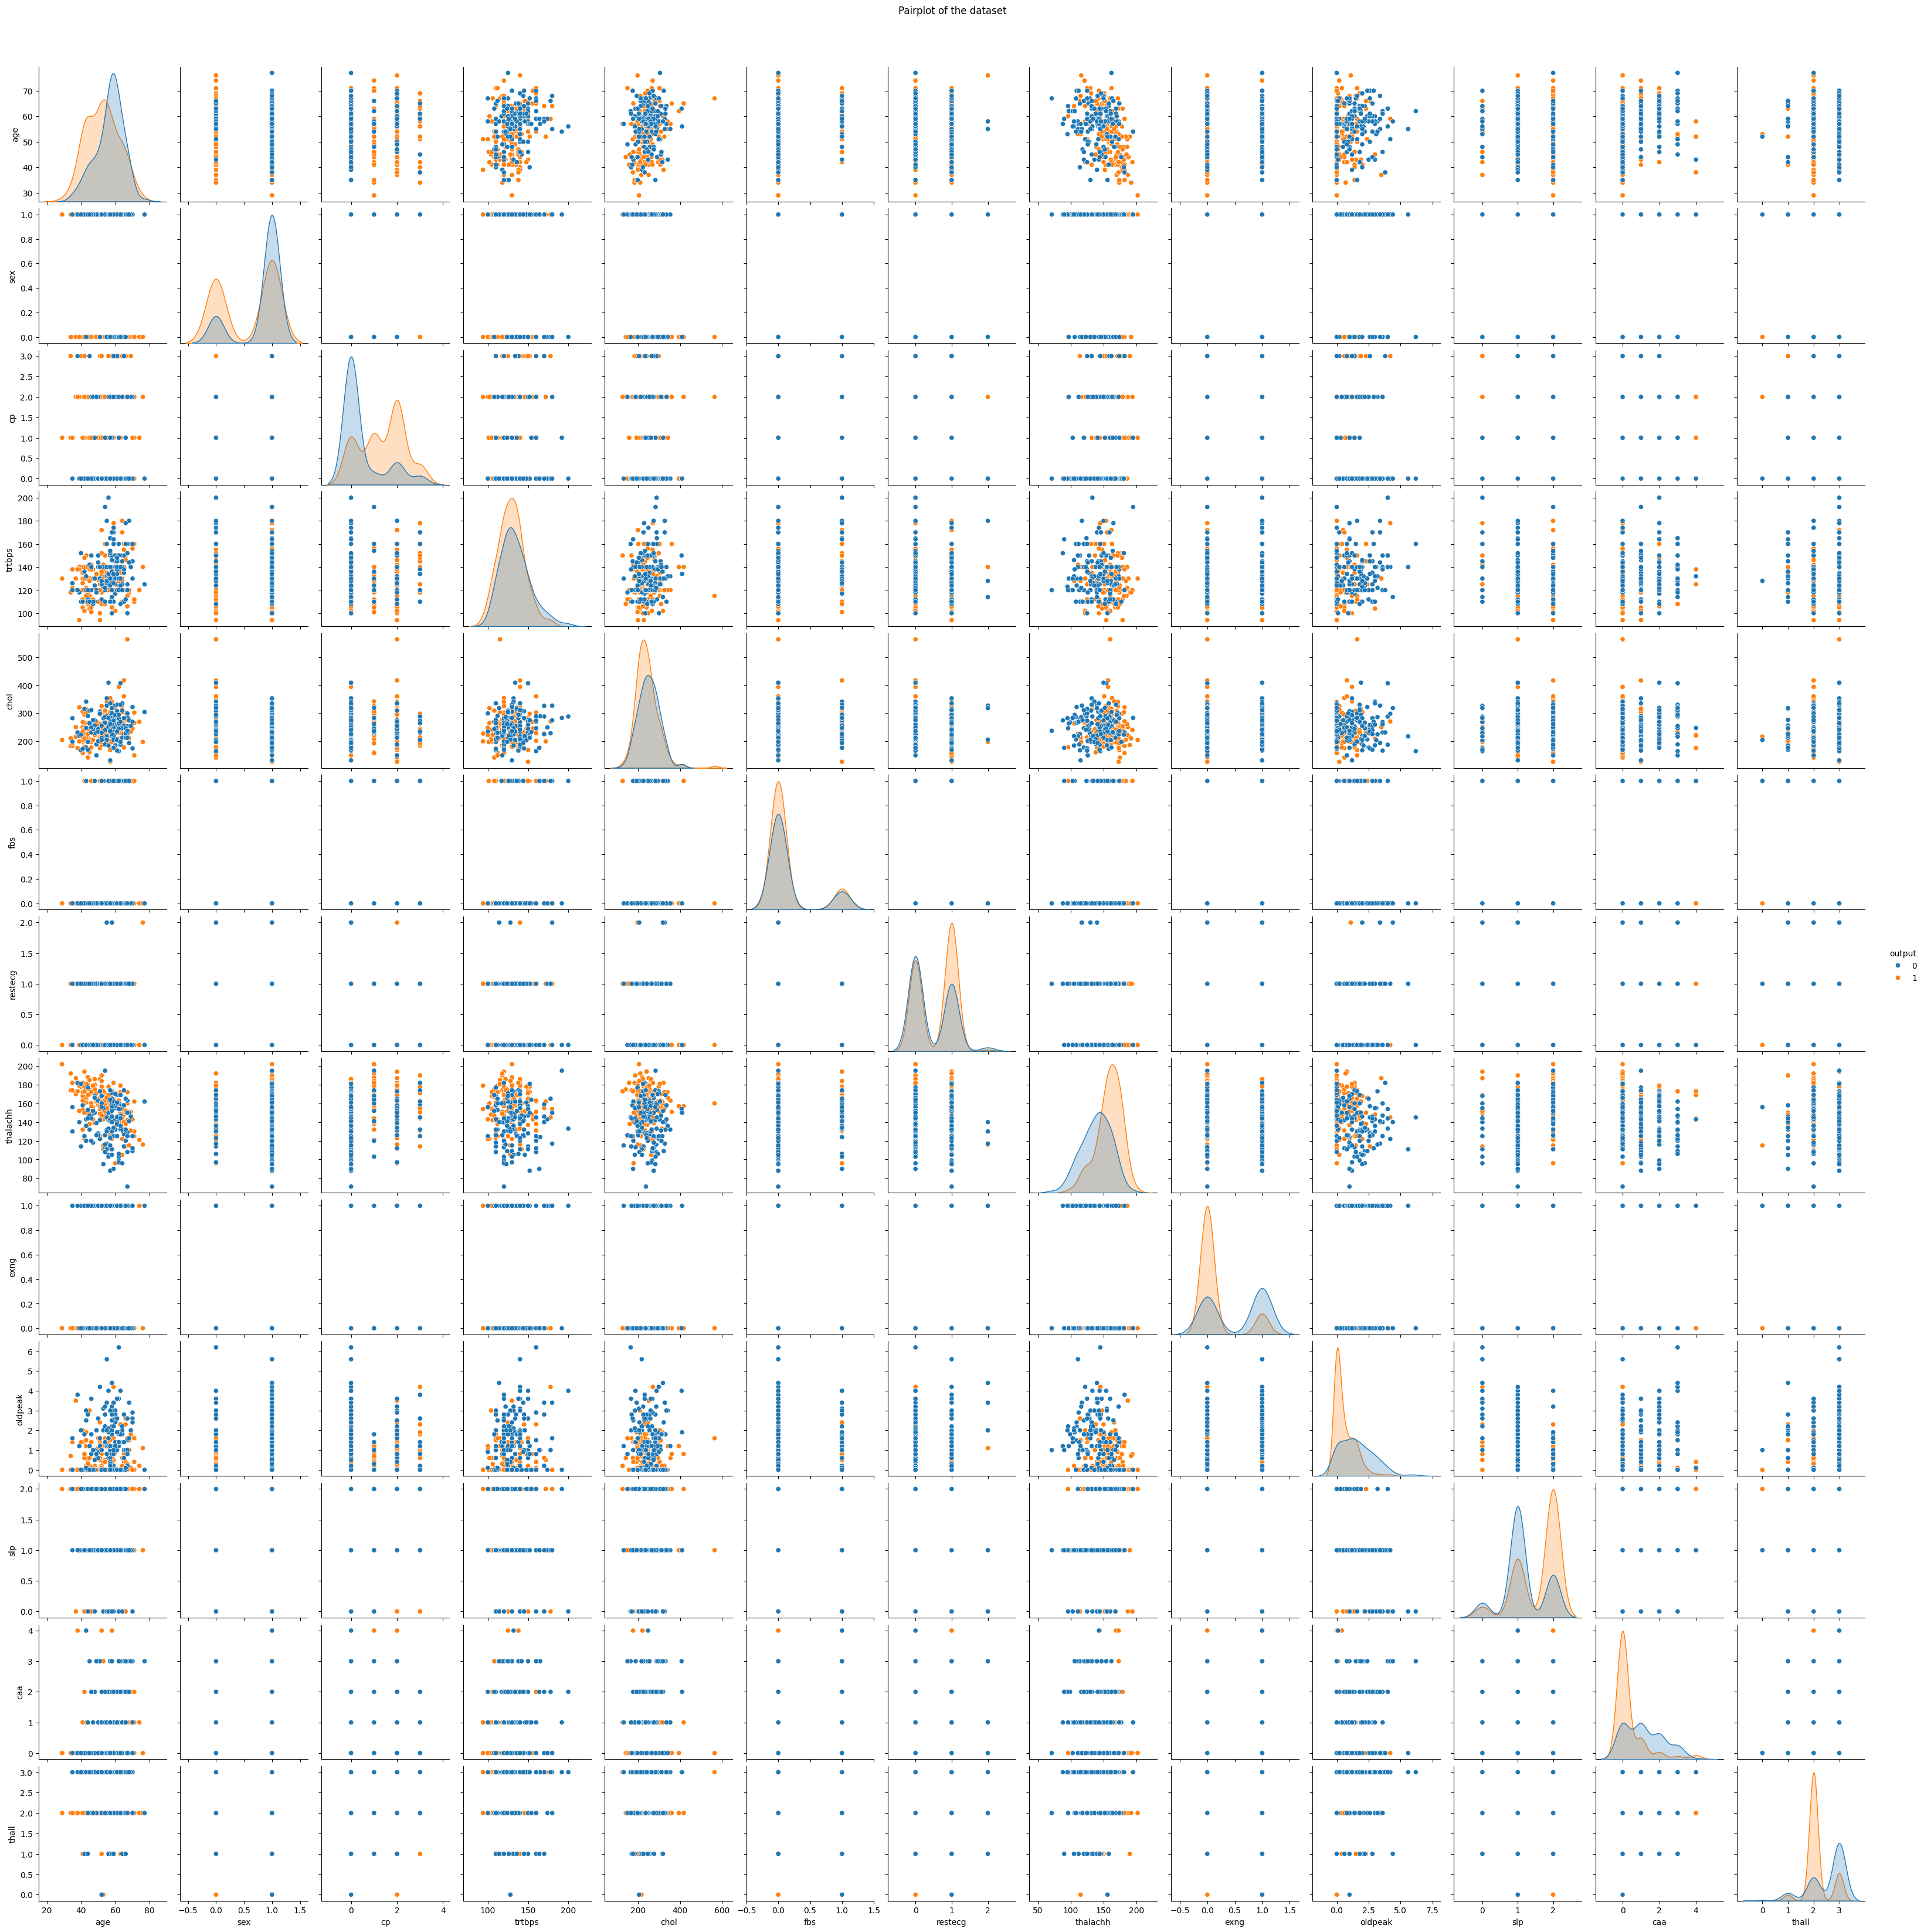

In [18]:
# sns.pairplot(heart, hue = 'output') 
# with title
sns.pairplot(heart, hue = 'output').fig.suptitle('Pairplot of the dataset', y=1.02)
plt.show()

 - Object with cp = 2 have higher chance of heart attack, with cp = 0 have lower chances of heart attack
 - Object with rest_ecg = 1 have higher chance of heart attack (having ST-T wave abnormality)
 - Object with higher thalachh have higher change of heart attack(higher Maximum heart rate achieve)
 - Object with exng = 0 have higher chance of heart attack
 - Object with lower oldpeak have higher chances of heart attack
 - Object with slp = 2 have higher chance of heart attack; with slp = 1 have lower chance of heart attack
 - Object with caa = 0 have higher chance of heart attack
 - Object with thall = 2 have much higher chance of heart attack

## 1.1 Category features 

In [19]:
category_features

['sex', 'cp', 'fbs', 'restecg', 'slp', 'caa', 'thall', 'exng']

1    207
0     96
Name: sex, dtype: int64


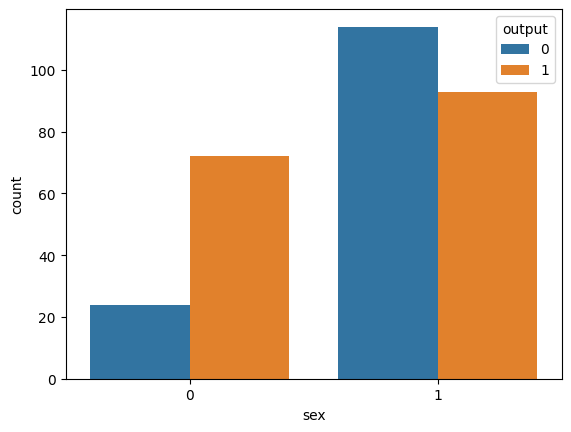

In [20]:
# sex
x = heart.sex.value_counts()
print(x)
p = sns.countplot(data = heart, x="sex", hue = "output")
# Objects having sex 1 are more than twice the objects having sex 0

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


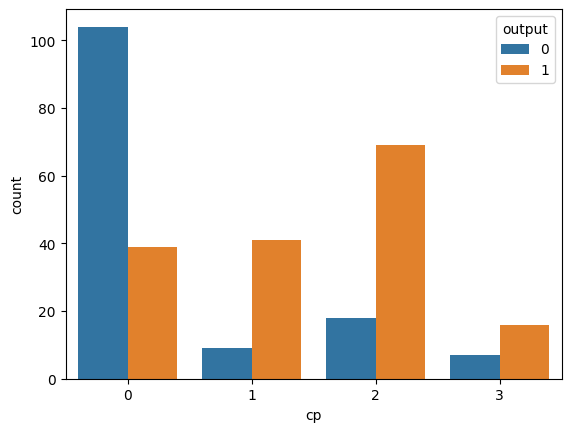

In [21]:
# cp
x = heart.cp.value_counts()
print(x)
p = sns.countplot(data = heart, x="cp", hue = "output")
# Objects of cp 0 have the largest count, cp 3 have the lowest count

0    258
1     45
Name: fbs, dtype: int64


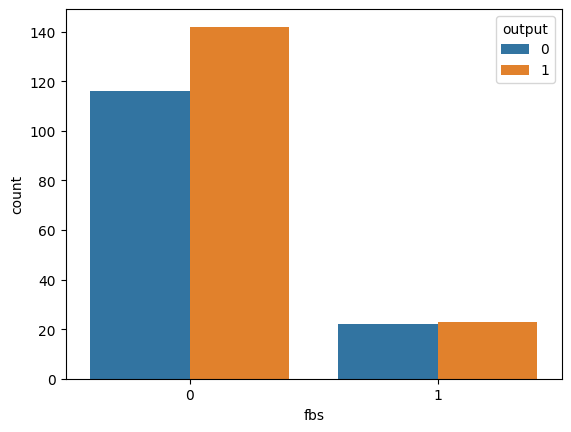

In [ ]:
# fbs
x = heart.fbs.value_counts()
print(x)
p = sns.countplot(data = heart, x="fbs", hue = "output")
# Objects having fbs 0 are more than four times the objects having fbs 1

1    151
0    147
2      4
Name: restecg, dtype: int64


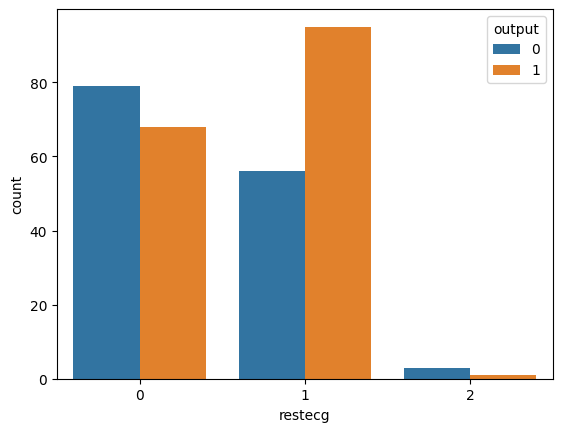

In [ ]:
# restecg
x = heart.restecg.value_counts()
print(x)
p = sns.countplot(data = heart, x="restecg", hue = "output")
# restecg-0 & restecg-1 have similar counts, restecg-2 have the lowest count restecg-2 is almost negligible

2    141
1    140
0     21
Name: slp, dtype: int64


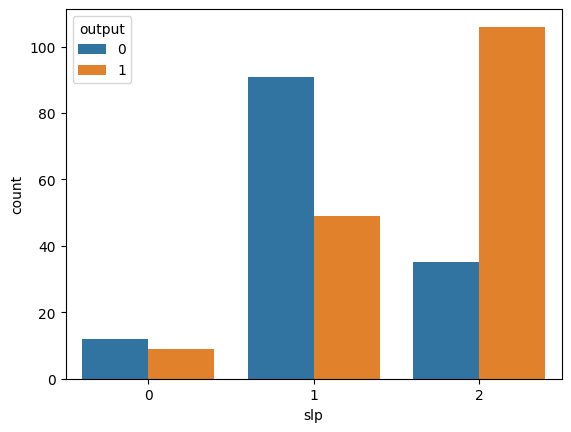

In [38]:
# slp
x = heart.slp.value_counts()
print(x)
p = sns.countplot(data = heart, x="slp", hue = "output")
# slp-1 & slp-2 have similar counts, slp-0 have the lowest count

0    175
1     65
2     38
3     20
4      4
Name: caa, dtype: int64


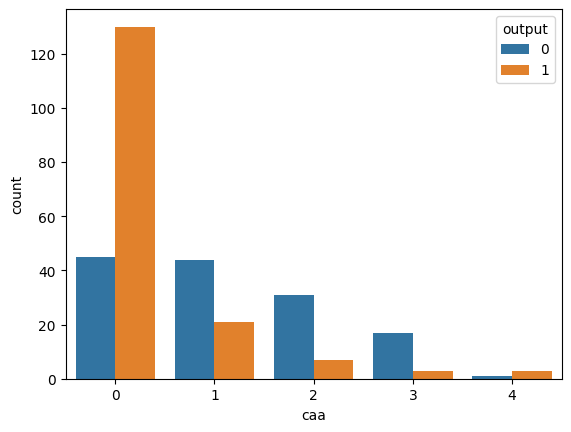

In [ ]:
# caa
x = heart.caa.value_counts()
print(x)
p = sns.countplot(data = heart, x="caa", hue = "output")
# caa-0 have the largest count, caa-4 have the lowest count

2    165
3    117
1     18
0      2
Name: thall, dtype: int64


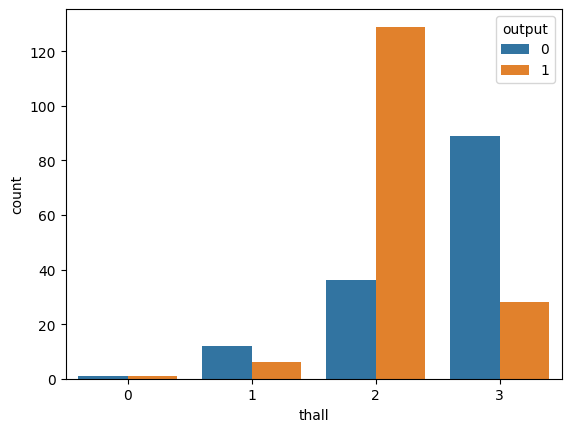

In [ ]:
# thall
x = heart.thall.value_counts()
print(x)
p = sns.countplot(data = heart, x="thall", hue = "output")
# thall-2 have the largest count, thall-0 have the lowest count

0    203
1     99
Name: exng, dtype: int64


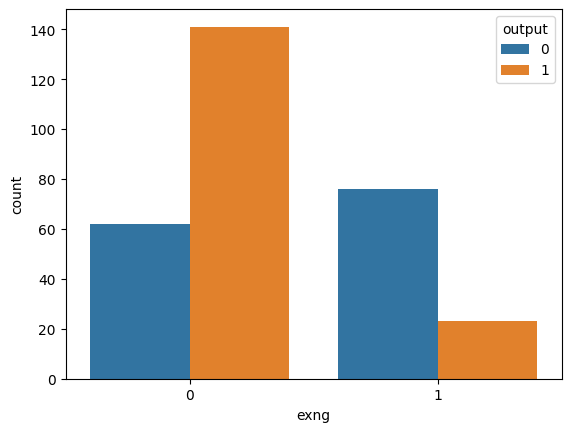

In [ ]:
# exng
x = heart.exng.value_counts()
print(x)
p = sns.countplot(data = heart, x="exng", hue = "output")
# exng-0 have more counts than exng-1

## 1.2 Numeric features

In [42]:
numeric_features

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

<Axes: xlabel='age', ylabel='Count'>

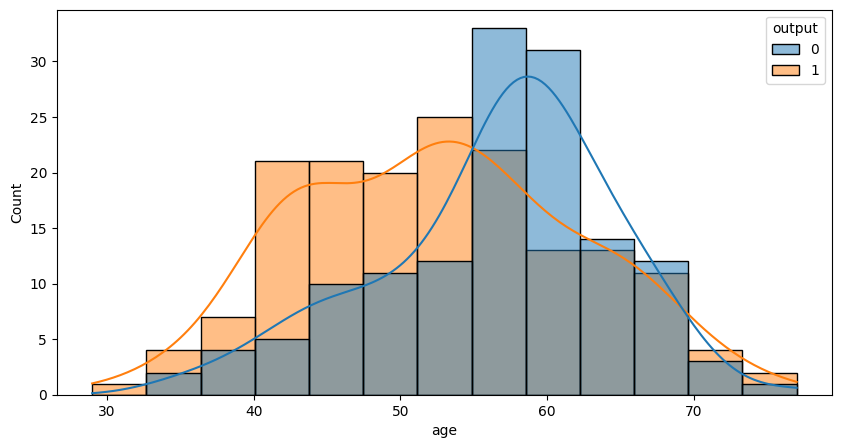

In [ ]:
# age
plt.figure(figsize = (10, 5))
sns.histplot(data = heart, x = "age", hue = "output", kde = True)
# age group 40-60 have more heart attacks

<Axes: xlabel='trtbps', ylabel='Count'>

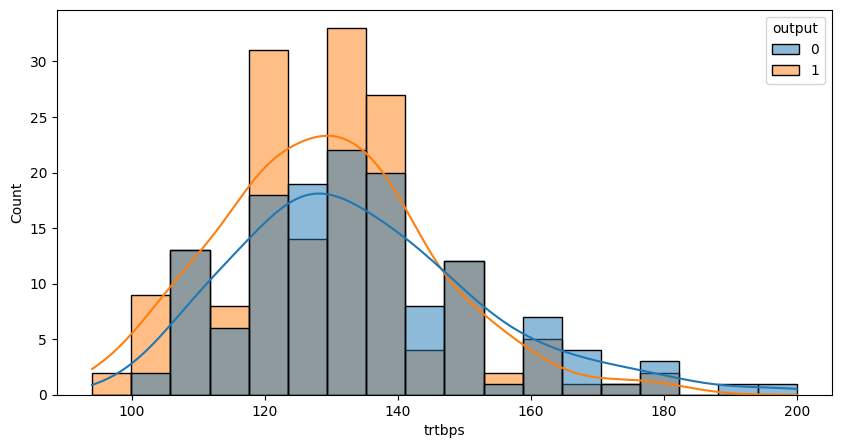

In [ ]:
# trtbps
plt.figure(figsize = (10, 5))
sns.histplot(data = heart, x = "trtbps", hue = "output", kde = True)
# trtbps group 120-140 have more heart attacks

<Axes: xlabel='chol', ylabel='Count'>

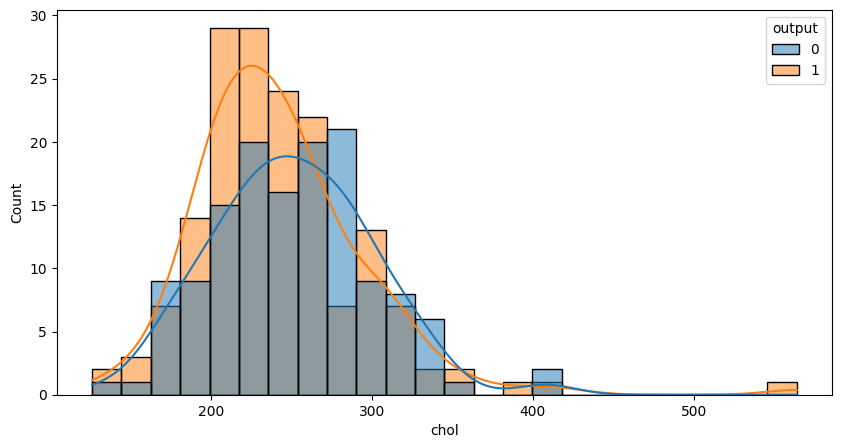

In [ ]:
# chol
plt.figure(figsize = (10, 5))
sns.histplot(data = heart, x = "chol", hue = "output", kde = True)
# chol group 200-300 have more heart attacks

<Axes: xlabel='thalachh', ylabel='Count'>

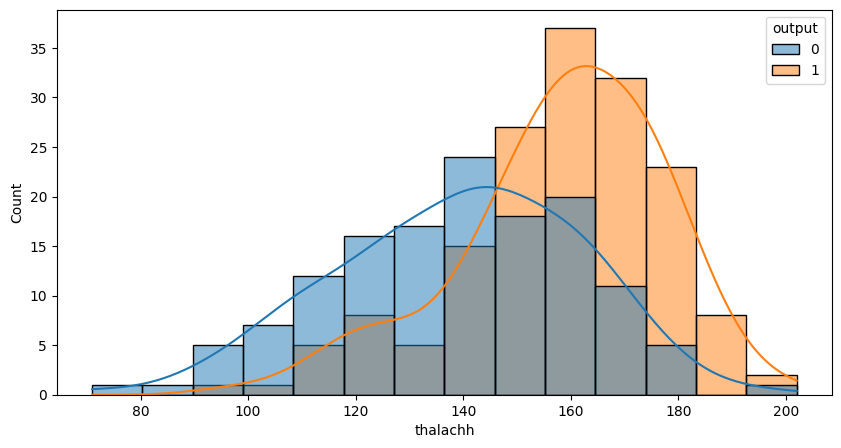

In [ ]:
# thalachh
plt.figure(figsize = (10, 5))
sns.histplot(data = heart, x = "thalachh", hue = "output", kde = True)
# thalachh group 150-200 have more heart attacks

<Axes: xlabel='oldpeak', ylabel='Count'>

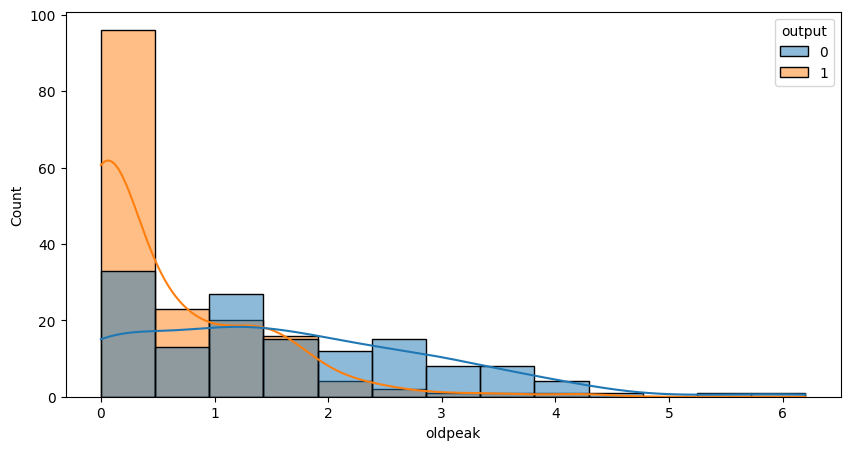

In [ ]:
# oldpeak
plt.figure(figsize = (10, 5))
sns.histplot(data = heart, x = "oldpeak", hue = "output", kde = True)
# oldpeak group 0-2 have more heart attacks

# 2. Data preprocessing

In [24]:
# Check null data
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Remove duplicate records

In [25]:
# Check repeated data
print('Number of repeated data:',heart.duplicated().sum())
heart[heart.duplicated()]

Number of repeated data: 1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [26]:
heart.drop_duplicates(keep='first', inplace=True)
print('After clean: Number of records:',heart.shape[0], '\nNumber of attributes:',heart.shape[1])

After clean: Number of records: 302 
Number of attributes: 14


## One-hot encoding for category features

In [27]:
x = heart.iloc[:,:-1]
# x.drop('output', axis = 1, inplace = True)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [28]:
y = heart.loc[:,'output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
col = x.columns
std = StandardScaler()
x = std.fit_transform(x)
x = pd.DataFrame(data = x, columns = col)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.949794,0.682656,1.976470,0.764066,-0.261285,2.389793,-1.002541,0.018826,-0.698344,1.084022,-2.271182,-0.714911,-2.147955
1,-1.928548,0.682656,1.005911,-0.091401,0.067741,-0.418446,0.901657,1.636979,-0.698344,2.118926,-2.271182,-0.714911,-0.513994
2,-1.485726,-1.464866,0.035352,-0.091401,-0.822564,-0.418446,-1.002541,0.980971,-0.698344,0.307844,0.979514,-0.714911,-0.513994
3,0.174856,0.682656,0.035352,-0.661712,-0.203222,-0.418446,0.901657,1.243374,-0.698344,-0.209608,0.979514,-0.714911,-0.513994
4,0.285561,-1.464866,-0.935208,-0.661712,2.080602,-0.418446,0.901657,0.587366,1.431958,-0.382092,0.979514,-0.714911,-0.513994


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

## Classification Methods

In [32]:
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

modelList = []
modelNameList = []

# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
modelList.append(lr)
modelNameList.append("Logistic Regression")
predictedLR = lr.predict(x_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, predictedLR)*100, "%")

# Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
modelList.append(lasso)
modelNameList.append("Lasso")
predictedLasso = lasso.predict(x_test)
predictedLasso = [1 if i > 0.5 else 0 for i in predictedLasso]
print("Lasso Accuracy: ", accuracy_score(y_test, predictedLasso)*100, "%")

# Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
modelList.append(ridge)
modelNameList.append("Ridge")
predictedRidge = ridge.predict(x_test)
predictedRidge = [1 if i > 0.5 else 0 for i in predictedRidge]
print("Ridge Accuracy: ", accuracy_score(y_test, predictedRidge)*100, "%")

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
modelList.append(dt)
modelNameList.append("Decision Tree")
predictedDT = dt.predict(x_test)
print("Decision Tree Accuracy: ", accuracy_score(y_test, predictedDT)*100, "%")

# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
modelList.append(rf)
modelNameList.append("Random Forest")
predictedRF = rf.predict(x_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, predictedRF)*100, "%")

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
modelList.append(gb)
modelNameList.append("Gradient Boosting")
predictedGB = gb.predict(x_test)
print("Gradient Boosting Accuracy: ", accuracy_score(y_test, predictedGB)*100, "%")

# Support Vector Machine
svm = SVC()
svm.fit(x_train, y_train)
modelList.append(svm)
modelNameList.append("Support Vector Machine")
predictedSVM = svm.predict(x_test)
print("Support Vector Machine Accuracy: ", accuracy_score(y_test, predictedSVM)*100, "%")

# Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
modelList.append(nb)
modelNameList.append("Naive Bayes")
predictedNB = nb.predict(x_test)
print("Naive Bayes Accuracy: ", accuracy_score(y_test, predictedNB)*100, "%")

# Neural Network
nn = MLPClassifier()
nn.fit(x_train, y_train)
modelList.append(nn)
modelNameList.append("Neural Network - MLP")
predictedNN = nn.predict(x_test)
print("Neural Network Accuracy: ", accuracy_score(y_test, predictedNN)*100, "%")


Logistic Regression Accuracy:  81.9672131147541 %
Lasso Accuracy:  52.459016393442624 %
Ridge Accuracy:  83.60655737704919 %
Decision Tree Accuracy:  80.32786885245902 %
Random Forest Accuracy:  83.60655737704919 %
Gradient Boosting Accuracy:  85.24590163934425 %
Support Vector Machine Accuracy:  86.88524590163934 %
Naive Bayes Accuracy:  88.52459016393442 %
Neural Network Accuracy:  85.24590163934425 %


C:\Users\zoezh\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


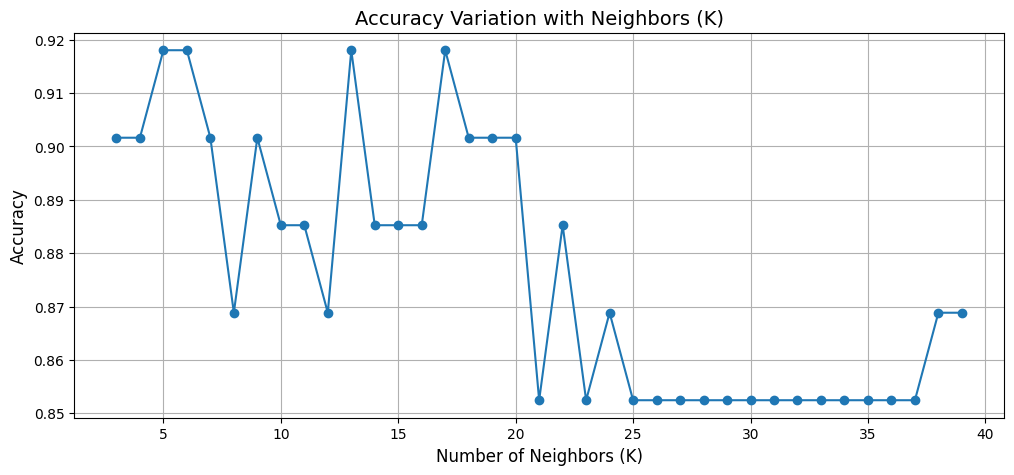

Best accuracy using KNN: 91.80% with K=5
K-Nearest Neighbors Final Accuracy: 91.80%


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize required variables
accuracyList = []
maxAccuracy = 0
maxIndex = 0
bestPred = None
best_predict_model = None

# Iterate over different values of neighbors
for i in range(3, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predicted = knn.predict(x_test)
    current_accuracy = accuracy_score(y_test, predicted)
    accuracyList.append(current_accuracy)
    if maxAccuracy < current_accuracy:
        maxAccuracy = current_accuracy
        maxIndex = i
        bestPred = predicted
        best_predict_model = knn

# Plot accuracy variation with neighbors
plt.figure(figsize=(12, 5))
plt.plot(range(3, 40), accuracyList, marker='o')
plt.xlabel('Number of Neighbors (K)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Variation with Neighbors (K)', fontsize=14)
plt.grid(True)
plt.show()

# Print the best accuracy and corresponding K value
print(f"Best accuracy using KNN: {maxAccuracy*100:.2f}% with K={maxIndex}")

# Train the best model on the full training set
knn = best_predict_model
knn.fit(x_train, y_train)

# Save the best model to modelList and modelNameList
modelList.append(knn)
modelNameList.append("K-Nearest Neighbors")

# Test the best model on the test set
predictedKNN = knn.predict(x_test)
print(f"K-Nearest Neighbors Final Accuracy: {accuracy_score(y_test, predictedKNN)*100:.2f}%")


## Clustering Methods

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score

# KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(x)
kmeans_silhouette = silhouette_score(x, kmeans_labels)
print(f'KMeans Silhouette Score: {kmeans_silhouette}')

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(x)
agglo_silhouette = silhouette_score(x, agglo_labels)
print(f'Agglomerative Clustering Silhouette Score: {agglo_silhouette}')

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(x)
# Filter out noise points for silhouette score calculation
dbscan_silhouette = silhouette_score(x[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')


KMeans Silhouette Score: 0.16806012892394878
Agglomerative Clustering Silhouette Score: 0.143700751676035


ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required.

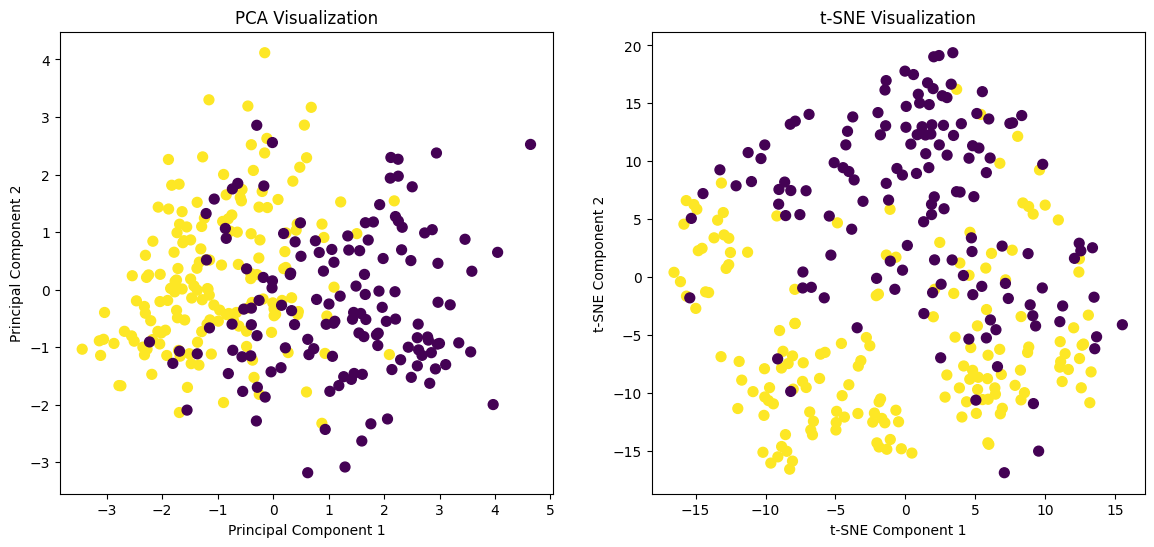

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Apply PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x)

# Visualize PCA
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', s=50)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Visualize t-SNE
plt.subplot(1, 2, 2)
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y, cmap='viridis', s=50)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.show()

## ARM - Apriori Analysis